In [49]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
# now plotly image can show in github
import plotly.io as pio
pio.renderers.default = 'svg'

In [51]:
from sklearn import set_config
set_config(display='diagram')

In [52]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [53]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [54]:
df.shape

(100, 3)

In [55]:
df.head()

,feature1,feature2,target
0,0.588518,1.237297,121.065260
1,-0.179855,1.381727,181.328827
2,0.910394,0.295919,28.836294
3,0.585878,0.355159,21.165746
4,0.409898,0.707548,116.200857


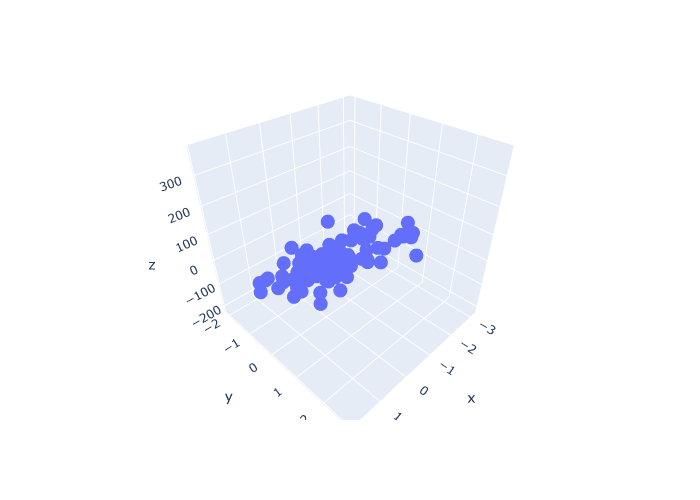

In [56]:
# Create a 3D scatter plot
points = px.scatter_3d(
    x=df['feature1'],  # X-axis values
    y=df['feature2'],  # Y-axis values
    z=df['target'],    # Z-axis values
)

# Show the plot
points.show()


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 40.250782239484714
MSE 2590.199699504525
R2 score 0.8384216846049055


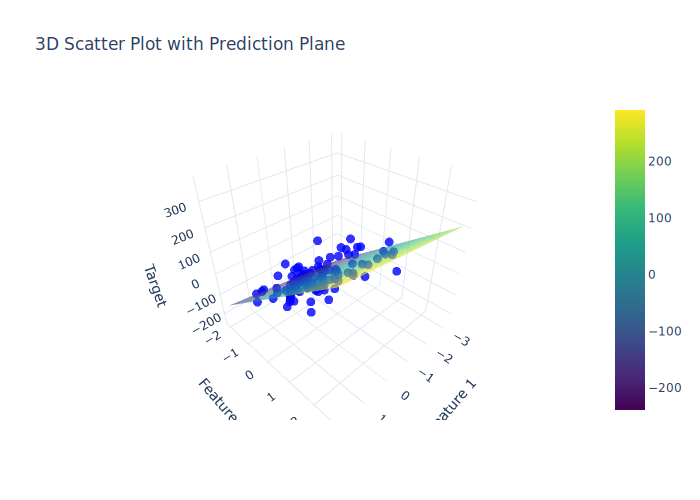

In [74]:

# Generate mesh grid for the prediction plane
x = np.linspace(df['feature1'].min(), df['feature1'].max(), 10)  # Adjust grid range based on your data
y = np.linspace(df['feature2'].min(), df['feature2'].max(), 10)

xGrid, yGrid = np.meshgrid(x, y)  # Create a grid for prediction
grid_points = np.vstack((xGrid.ravel(), yGrid.ravel())).T  # Flatten the grid for prediction

# Assuming 'lr' is your model and you have trained it
zPlane = lr.predict(grid_points).reshape(xGrid.shape)  # Predictions on the grid

# Create 3D scatter plot
scatter = go.Scatter3d(
    x=df['feature1'],
    y=df['feature2'],
    z=df['target'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8)
)

# Create prediction surface (the plane)
plane = go.Surface(
    z=zPlane,
    x=xGrid,
    y=yGrid,
    colorscale='Viridis',  # Customize surface colors
    opacity=0.6  # Adjust the opacity of the plane for visibility
)

# Create the figure and add both the scatter and surface
fig = go.Figure(data=[scatter, plane])

# Update layout to set camera angle and axis titles
fig.update_layout(
    template='plotly_white',
    title='3D Scatter Plot with Prediction Plane',
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target'
    ),
    meta=dict(
        eye=dict(x=3, y=1.5, z=5),  # Adjust the angle of the view
        up=dict(x=5, y=10, z=0)  # Make sure the 'up' direction is correct
    )
)

# Show the plot
fig.show()


- Change the plotly pio fuction to make it interactive

In [66]:
lr.coef_

array([16.60167326, 93.27276665])

In [67]:
lr.intercept_

np.float64(3.933941453836968)